# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

Text(0.5,1,'Diastolic Blood Pressure')

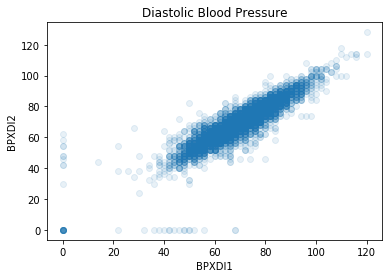

In [2]:
# enter your code here
s = sns.regplot(x='BPXDI1',y='BPXDI2',data=da, fit_reg=False,scatter_kws={'alpha':0.1})
s.set_title("Diastolic Blood Pressure")


In [3]:
da[['BPXDI1','BPXDI2','BPXSY1','BPXSY2']].corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.316531,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.303847
BPXSY1,0.316531,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.303847,0.962287,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

Repeated diastolic blood pressure measurements has 0.88 correlation vs repeated systolic blood pressure measurements at 0.96

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

BPSys2 and BPDia2 correlation = 0.33 WINNER (just) <br>
BpSys1 and BPDia1 correlation = 0.32

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

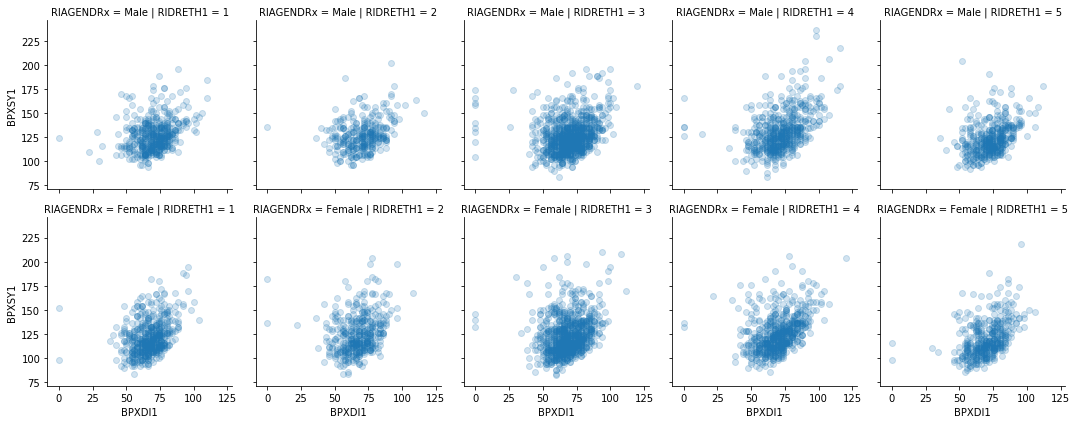

In [4]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
# insert your code here
_ = sns.FacetGrid(da,col='RIDRETH1',row='RIAGENDRx').map(plt.scatter, 'BPXDI1','BPXSY1', alpha =0.2).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

There appears to be slightly stronger (positive) correlation evident in females of ethnicity 4 and 5.
Males in ethnicity group 1,2,3 do not show strong correlation. Males in ethnic group 4 and 5 show some correlation.


## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [5]:
# insert your code here
plt.figure(figsize=(12,4))
a = sns.violinplot(da.DMDEDUC3,da.RIDAGEYR,hue=da.RIAGENDRx)

AttributeError: 'DataFrame' object has no attribute 'DMDEDUC3'

<Figure size 864x288 with 0 Axes>

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

Appears as though persons with education = 1 mean age is around 60 and higher than the other educational groups.
Overally it seems as though persons in their 40s are slightly under represented in all of the educational groups.

In [ ]:
da_BMI.BMXBMI.describe()

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [ ]:
# insert your code here
da["agegrp"] = pd.cut(da.RIDAGEYR, [17, 30, 40, 50, 60, 70, 81],labels= ['18-30', '30-40', '40-50',
                                                                        '50-60','60-70','70-80'])

da_BMI = da[da['BMXBMI'].notna()]

plt.figure(figsize=(12,6))
b = sns.violinplot(da_BMI.agegrp,da_BMI.BMXBMI,hue=da_BMI.RIAGENDRx)

__Q5a.__ Comment on the trends in BMI across the demographic groups.

Females tend to have a slightly higher median BMI across nearly every age group. <br>
Female distribution also shows a larger spread, while male are more centred around the median.<br>
Every distribution also shows a large right skew towards larger BMIs.


## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [ ]:
da.HIQ210.describe()

In [12]:
# insert your code here
da['Ethnicity'] = da['RIDRETH1'].replace({1:'Mexican American',2:'Other Hispanic',
                                     3:'Non-Hispanic White',4:'Non Hispanic Black',
                                     5: 'Other Race'})
da['Insurance'] = da['HIQ210'].replace({1:'Yes',2:'No',9:"Don't Know"})


x = pd.crosstab(da.Ethnicity,da.Insurance)
x = x.apply(lambda z: z/z.sum(),axis=1)
x.round(4)


Insurance,Don't Know,No,Yes
Ethnicity,,,
Mexican American,0.0045,0.8576,0.1380
Non Hispanic Black,0.0010,0.8904,0.1087
Non-Hispanic White,0.0012,0.9314,0.0674
Other Hispanic,0.0000,0.8713,0.1287
Other Race,0.0025,0.9157,0.0818


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Mexican Americans. 